# Lecture 7

Now let's review the textbook materials

In [29]:
%matplotlib inline
from preamble import *
from IPython.display import Image

w[0]: 0.393906  b: -0.031804


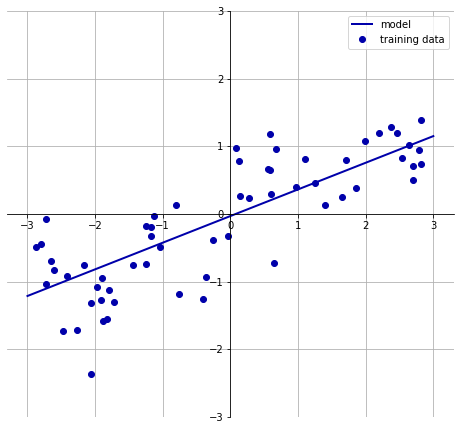

In [30]:
mglearn.plots.plot_linear_regression_wave()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [32]:
lr.predict(X_train)

array([ 0.027,  0.207, -1.076, -0.925, -0.845,  0.936, -0.525,  1.069,
       -1.107,  0.642, -1.004, -0.78 ,  0.002,  0.46 ,  0.222, -0.742,
       -0.494, -0.136,  0.965,  1.079, -1.06 ,  0.901, -0.043, -0.983,
       -1.104, -0.602,  1.033, -0.884,  0.516,  0.016, -0.173,  0.697,
       -0.348, -0.777, -1.165, -0.523, -0.193, -0.445,  0.233,  0.834,
       -1.132, -0.784,  0.187,  0.618,  0.404])

In [33]:
lr.predict(X_test)

array([-0.328, -0.845, -0.494,  0.352, -0.712,  0.2  ,  1.029,  0.079,
        0.754, -0.75 , -0.477,  1.078, -0.81 ,  0.201,  1.007])

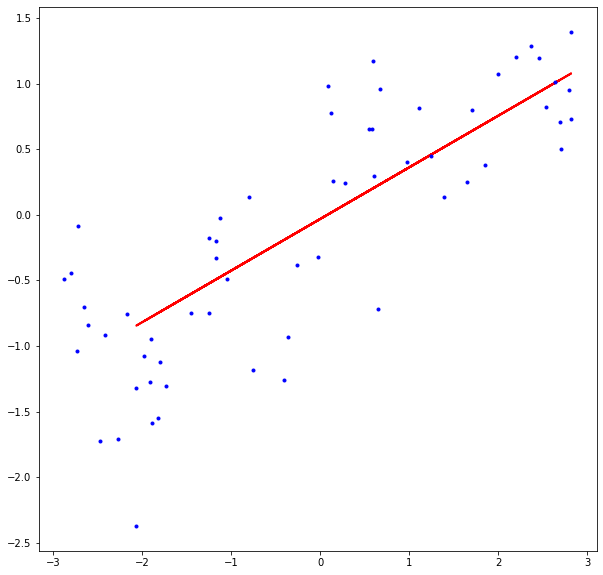

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(X_test, lr.predict(X_test), "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [35]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


# 1. Let's review the codes above.

You need to understand what this mglearn.datasets.make_wave() calls for. How?

In [37]:
X, y = mglearn.datasets.make_wave(n_samples=1000) # produce more data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.453]
lr.intercept_: 0.04435654574547011
Training set score: 0.63
Test set score: 0.59


Scikit-Learn’s API is remarkably well designed. All objects share a consistent and simple interface.

1. Any object that can estimate some parameters based on a dataset is called an *estimator*.
    
    - e.g. LinearRegression is an estimator
    - The estimation itself is performed by the *fit()* method, and it takes a dataset as a parameter
        - it could accept only one input for unsupervised learning algorithms

2. Some estimators are capable of making predictions, which called *predictors*. 

    - LinearRegression model has a predict() method that takes a dataset of new instances and returns a datset of corresponding predictions.
    - It also has a score() method that measures the quality of the predictions
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



Let's see the methods corresponding to LinearRegression class.

In [6]:
lr

LinearRegression()

In [7]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

Now look at the inputs in score(). Go back to: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

Explain the following codes in words:

In [9]:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.63
Test set score: 0.59


Revisit Lecture 2: https://yeabinmoonecon.github.io/ibs_course/BUS212_ADA/lecture_note/lecture2.html#/31/0/3

We are going to learn more on this later

# 2. How do we get the estimates?

The first method is to use a closed-form solution. That is, there is a unique solution $\beta$'s minimizes RSS. You may have seen a formula: $\hat{\beta}=(X'X)^{-1}X'y$. This is called the normal equation.

In [3]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np

X_b = add_dummy_feature(X_train)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

NameError: name 'X_train' is not defined

In [ ]:
print(theta_best)
print("Ealier, we've got: ",lr.intercept_, lr.coef_)

[0.044 0.453]
Ealier, we've got:  0.04435654574547011 [0.453]


Now using the test set, predict y

In [17]:
X_new_b = add_dummy_feature(X_test)
y_predict = X_new_b @ theta_best
y_predict[:10]

array([ 0.921, -1.166, -0.162, -0.782,  1.172, -0.614, -0.934,  1.362,
       -0.889, -0.812])

Performing linear regression using Scikit-Learn is relatively straightforward

In [18]:
lr = LinearRegression().fit(X_train, y_train)
lr.predict(X_test)[:10]

array([ 0.921, -1.166, -0.162, -0.782,  1.172, -0.614, -0.934,  1.362,
       -0.889, -0.812])

## 2.2 More on estimation methods

Let's construct a large data

In [6]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100000, n_features=1000, n_informative= 100, n_targets=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Look at the time differential

In [7]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_[:100])

lr.coef_: [ 0.    -0.     0.    -0.    -0.     0.     0.    -0.    -0.     0.
  0.     0.     0.     0.     0.    -0.    -0.     0.    -0.    -0.
 69.135  0.     0.    -0.    -0.    -0.    -0.    -0.    -0.     0.
  0.    -0.    -0.    -0.     0.    -0.     0.     0.     0.    -0.
 -0.     0.    -0.     0.     0.     0.    76.48   0.    -0.     0.
 -0.    -0.    31.213 -0.     0.    -0.     0.     0.     0.    -0.
  0.     0.    -0.     0.     0.    -0.     0.    -0.     0.     0.
 -0.     0.    -0.     0.     0.     0.    -0.    -0.    -0.     0.
 -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.     0.
  0.    -0.    -0.    99.302 -0.    -0.    -0.    -0.     0.    -0.   ]


In [8]:
X_b = add_dummy_feature(X_train)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
print(theta_best[1:100])

[ 0.     0.     0.     0.    -0.    -0.    -0.    -0.     0.    -0.
 -0.    -0.     0.     0.     0.    -0.     0.    -0.     0.    -0.
 69.135  0.     0.    -0.    -0.    -0.    -0.     0.     0.     0.
  0.     0.    -0.     0.     0.     0.     0.    -0.    -0.    -0.
  0.     0.     0.     0.    -0.     0.    76.48   0.    -0.     0.
  0.     0.    31.213  0.     0.     0.     0.    -0.    -0.    -0.
 -0.     0.    -0.     0.     0.    -0.     0.    -0.    -0.     0.
 -0.    -0.     0.     0.    -0.     0.     0.    -0.     0.    -0.
  0.     0.    -0.    -0.     0.     0.     0.     0.    -0.     0.
  0.    -0.    -0.    99.302  0.     0.    -0.    -0.    -0.   ]


The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly:

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y_train, rcond=1e-6)
theta_best_svd[1:100]

array([-0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
       -0.   ,  0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , 69.135,  0.   ,  0.   ,  0.   ,
        0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
       -0.   ,  0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , 76.48 ,  0.   ,
       -0.   ,  0.   , -0.   ,  0.   , 31.213,  0.   , -0.   , -0.   ,
        0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,
       -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , -0.   ,  0.   , -0.   , 99.302, -0.   ,  0.   ,
        0.   , -0.   ,  0.   ])

What matters here is how to invert $X$, and sklearn uses pseudoinverse of $X$ 

In [10]:
%timeit np.linalg.inv(np.random.rand(100,100))

170 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%timeit np.linalg.inv(np.random.rand(1000,1000))

30.5 ms ± 757 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit np.linalg.inv(np.random.rand(2000,2000))

192 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit np.linalg.inv(np.random.rand(4000,4000))

1.32 s ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now we will look at a very different way to train a linear regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory.

# 3. Gradient descent

Chapter 4: 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition'

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient descent does: it measures the local gradient of the error function with regard to the parameter vector $\beta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

In practice, you start by filling $\beta$ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum

In [20]:
Image(url="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0403.png", width=900, height=500)

An important parameter in gradient descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

In [21]:
Image(url="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0404.png", width=900, height=500)

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

In [22]:
Image(url="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0405.png", width=900, height=500)

Additionally, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult

In [23]:
Image(url="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0406.png", width=900, height=500)

In [26]:
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

X_b = add_dummy_feature(X)

eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [27]:
theta

array([[4.215],
       [2.77 ]])

In [28]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.215],
       [2.77 ]])

What is the problem here?